In [1]:
import numpy as np
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

from time import time
from time import sleep
import matplotlib.pyplot as plt

In [2]:
a = np.load('../04_build_training_dataset/numbers.npz')
train_images = a['trainset']
train_labels = a['train_labels']
test_images = a['testset']
test_labels = a['test_labels']

In [3]:
train_images.shape,test_images.shape

((13377, 28, 28), (1487, 28, 28))

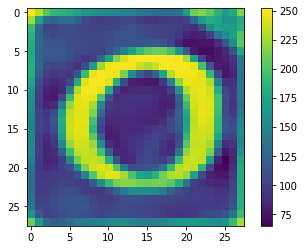

In [4]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

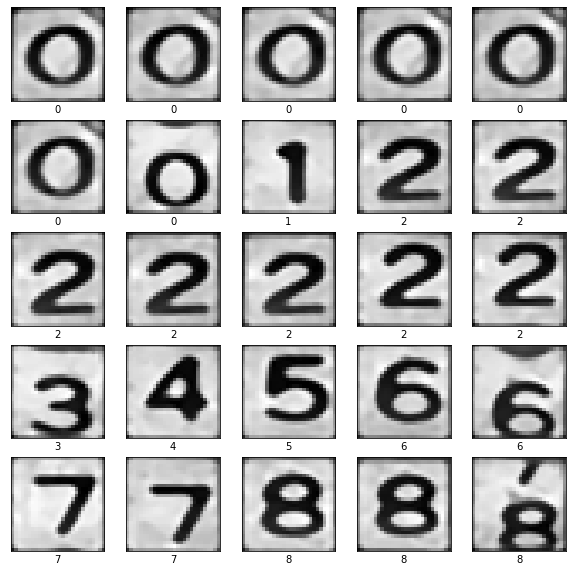

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j = int(i* len(train_labels)/25)
    plt.imshow(train_images[j], cmap=plt.cm.binary)
    plt.xlabel(train_labels[j])
plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
419/419 [==============================] - 1s 2ms/step - loss: 0.3863 - accuracy: 0.9080
Epoch 2/5
419/419 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9886
Epoch 3/5
419/419 [==============================] - 1s 2ms/step - loss: 0.0376 - accuracy: 0.9931
Epoch 4/5
419/419 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9947
Epoch 5/5
419/419 [==============================] - 1s 2ms/step - loss: 0.0176 - accuracy: 0.9962: 0s - los


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

47/47 - 0s - loss: 0.0164 - accuracy: 0.9960

테스트 정확도: 0.9959650039672852


In [11]:
predictions = model.predict(test_images)

In [12]:
predictions[0]

array([9.9998081e-01, 1.6609322e-12, 9.8660003e-08, 1.7251629e-09,
       3.7056132e-11, 4.8656973e-12, 1.5534682e-05, 2.1989285e-06,
       7.2504768e-08, 1.2629516e-06], dtype=float32)

In [13]:
np.argmax(predictions[0])

0

In [14]:
test_labels[0]

0

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

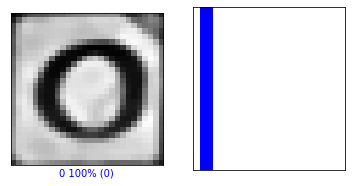

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

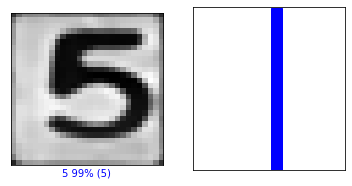

In [17]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

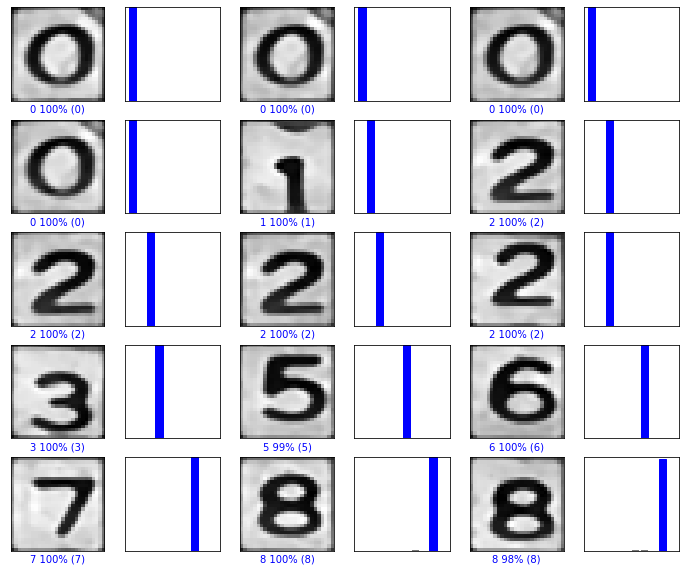

In [18]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i*100, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i*100, predictions, test_labels)
plt.show()

In [19]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3920030251760011589
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13596172744627918747
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10993698112
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16296416052524290665
physical_device_desc: "device: 0, name: TITAN X (Pascal), pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9980699795694115966
physical_device_desc: "device: XLA_GPU device"
]


In [20]:
model.save('model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets
